<a href="https://colab.research.google.com/github/alexpaulo100/mini-projeto-modelagem-preditiva-ts/blob/main/Mini_Projeto3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mini-Projeto 3 - Modelagem Preditiva com Linguagem Python e TensorFlow

Neste Mini-Projeto fiz uma modelagem preditiva usando Linguagem Python e TensorFlow.
 

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.15


In [3]:
# Importando NumPy
import numpy as np

In [4]:
np.__version__

'1.21.6'

In [6]:
# Instala o TensorFlow
!pip install -q tensorflow==2.7.0

     |████████████████████████████████| 665.5 MB 23 kB/s 
     |████████████████████████████████| 1.3 MB 26.1 MB/s 
     |████████████████████████████████| 463 kB 37.9 MB/s 


In [ ]:
# Instala o Pydot
!pip install -q pydot

In [8]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.7.0


## Carregando os Dados

### Boston House Prices Dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Características:

* Número de Observções: 506
* Os primeiros 13 recursos são recursos preditivos numéricos / categóricos. 
* O último (atributo 14): o valor mediano é a variável de destino.

In [10]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

57344/49082 [===================================] - 0s 1us/step


In [11]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [12]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [13]:
# Shape
dataset.shape

(506, 14)

In [14]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Vamos dividir os dados em treino e teste com proporção 80/20.

In [15]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

* Variável independente: 'RM'
* Variável dependente: 'MEDV'

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV=f(RM)$ e queremos estimar a função $f()$ usando regressão linear.

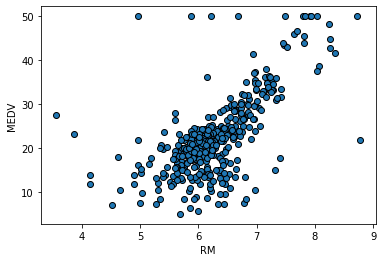

In [16]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

Vamos separar x e y.

In [17]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

Queremos encontrar os parâmetros (**W**) que permitem prever a saída y a partir da entrada x:

$y = w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

*layers.Dense(1, use_bias=True, input_shape=(1,))*

In [18]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [19]:
# Cria o modelo 
modelo = modelo_linear()

### Treinamento do Modelo

In [21]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [22]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [23]:
# Lista para as previsões
predictions_list = []

In [24]:
# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [25]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [26]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [27]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 1s 178ms/step - loss: 668.6624 - mae: 24.2827 - mse: 668.6624 - val_loss: 762.3330 - val_mae: 25.5587 - val_mse: 762.3330
Epoch 2/4000
2/2 [==============================] - 0s 34ms/step - loss: 661.4146 - mae: 24.1375 - mse: 661.4146 - val_loss: 754.7608 - val_mae: 25.4127 - val_mse: 754.7608
Epoch 3/4000
2/2 [==============================] - 0s 26ms/step - loss: 654.3024 - mae: 23.9921 - mse: 654.3024 - val_loss: 747.2349 - val_mae: 25.2669 - val_mse: 747.2349
Epoch 4/4000
2/2 [==============================] - 0s 32ms/step - loss: 647.2073 - mae: 23.8468 - mse: 647.2073 - val_loss: 739.7626 - val_mae: 25.1212 - val_mse: 739.7626
Epoch 5/4000
2/2 [==============================] - 0s 31ms/step - loss: 640.0964 - mae: 23.7019 - mse: 640.0964 - val_loss: 732.3433 - val_mae: 24.9758 - val_mse: 732.3433
Epoch 6/4000
2/2 [==============================] - 0s 35ms/step - loss: 633.1264 - mae: 23.5570 - mse: 633.1264 - val_loss: 724.9722 

In [28]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [29]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [30]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [31]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [32]:
df.head()

,MSE em Treino,MSE em Validação
0,668.662415,762.333008
1,661.414612,754.760803
2,654.302429,747.234863
3,647.207275,739.762634
4,640.096375,732.343323


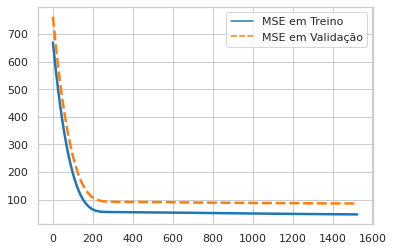

In [33]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [34]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [35]:
# Imprime as previsões
previsoes

array([21.253803, 19.204062, 23.738796, 21.597956, 20.980503, 21.061481,
       24.244904, 22.088882, 21.385391, 21.223436, 25.363407, 23.344032,
       21.562529, 22.762007, 23.20232 , 21.84595 , 26.330074, 23.283298,
       28.400059, 20.479454, 20.86916 , 21.33984 , 19.872124, 21.253803,
       19.679802, 23.414886, 22.883472, 15.797949, 18.217148, 33.253643,
       21.744726, 19.067411, 20.519945, 22.8278  , 30.166378, 24.08295 ,
       22.007904, 27.195522, 25.282429, 30.723099, 26.836182, 29.381912,
       30.611755, 18.217148, 23.045425, 23.222565, 19.173695, 23.450317,
       34.918743, 33.37005 , 19.006678, 32.85888 , 29.791859, 25.414017,
       23.52623 , 22.8278  , 25.591156, 27.043686, 24.422043, 24.103195,
       23.136528, 19.75572 , 23.333908, 22.83286 , 21.420818, 20.702143,
       21.532162, 22.306507, 21.876316, 21.8004  , 26.375622, 24.518204,
       12.97386 , 15.565138, 18.146294, 23.283298, 18.465143, 18.859907,
       23.313663, 21.75485 , 20.707205, 25.449448, 

# Fim